<a href="https://colab.research.google.com/github/min02yam/R-study/blob/main/%EC%97%B0%EC%8A%B5/caret.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**caret**<br>
2022.06.13

In [ ]:
install.packages(c("tidyvers","skimr","magrittr", "pacman"))
install.packages(c("leaps","ksvm","e1071","caret", "xgboost", "pROC"))

In [2]:
pacman:: p_load( "tidyvers","skimr","magrittr",  "leaps","ksvm","e1071","caret", "xgboost", "pROC" )

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘tidyvers’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Warning message:
“'BiocManager' not available.  Could not check Bioconductor.

Please use `install.packages('BiocManager')` and then retry.”
Warning message in p_install(package, character.only = TRUE, ...):
“”
Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘tidyvers’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘dataExplorer’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/

# [예제] 분류
For classification: ‘box’, ‘strip’,
          ‘density’, ‘pairs’ or ‘ellipse

In [22]:
install.packages("AppliedPredictiveModeling")
library(AppliedPredictiveModeling)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plotrix’, ‘rpart.plot’, ‘CORElearn’, ‘ellipse’




In [28]:
skim(iris)
dplyr::glimpse(iris)

── Data Summary ────────────────────────
                           Values
Name                       iris  
Number of rows             150   
Number of columns          5     
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  4     
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique
1 Species               0             1 FALSE          3
  top_counts               
1 set: 50, ver: 50, vir: 50

── Variable type: numeric ──────────────────────────────────────────────────────
  skim_variable n_missing complete_rate mean    sd  p0 p25  p50 p75 p100 hist 
1 Sepal.Length          0             1 5.84 0.828 4.3 5.1 5.8  6.4  7.9 ▆▇▇▅▂
2 Sepal.Width           0             1 3.06 0.436 2   2.8 3    3.3  4.4 ▁▆▇▂▁
3 Petal.Length          0             1 3.76 1.7

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


Rows: 150
Columns: 5
$ Sepal.Length <dbl> 5.1, 4.9, 4.7, 4.6, 5.0, 5.4, 4.6, 5.0, 4.4, 4.9, 5.4, 4.…
$ Sepal.Width  <dbl> 3.5, 3.0, 3.2, 3.1, 3.6, 3.9, 3.4, 3.4, 2.9, 3.1, 3.7, 3.…
$ Petal.Length <dbl> 1.4, 1.4, 1.3, 1.5, 1.4, 1.7, 1.4, 1.5, 1.4, 1.5, 1.5, 1.…
$ Petal.Width  <dbl> 0.2, 0.2, 0.2, 0.2, 0.2, 0.4, 0.3, 0.2, 0.2, 0.1, 0.2, 0.…
$ Species      <fct> setosa, setosa, setosa, setosa, setosa, setosa, setosa, s…


Scatterplot Matrix

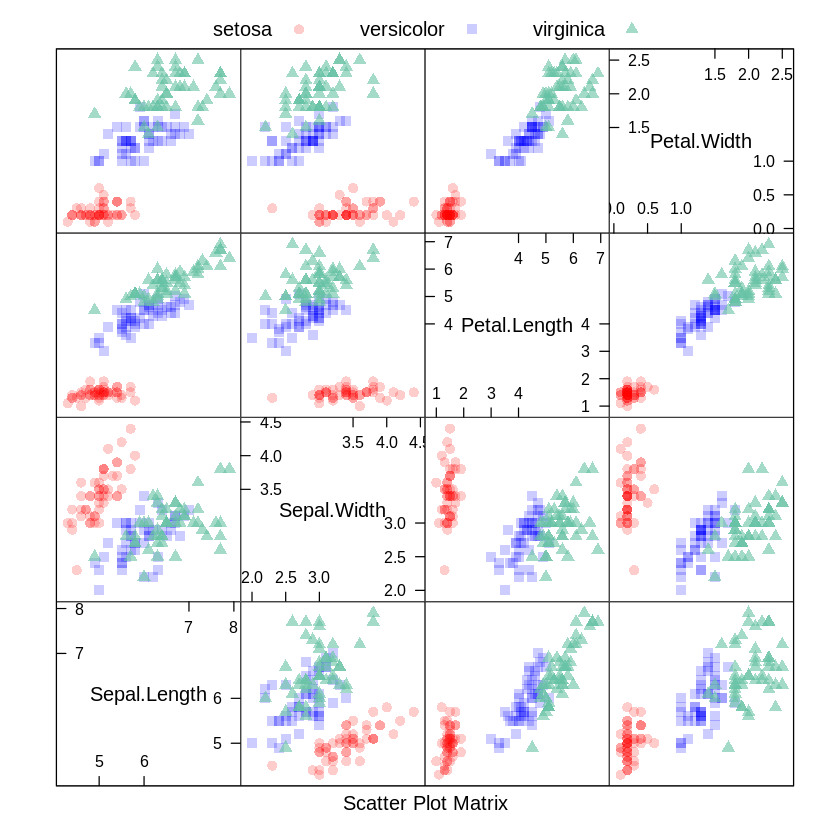

In [37]:
transparentTheme(trans = .2) 
caret::featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "pairs",
            ## Add a key at the top
            auto.key = list(columns = 3))

Scatterplot Matrix with Ellipses <br>
타원이 있는 산점도 행렬

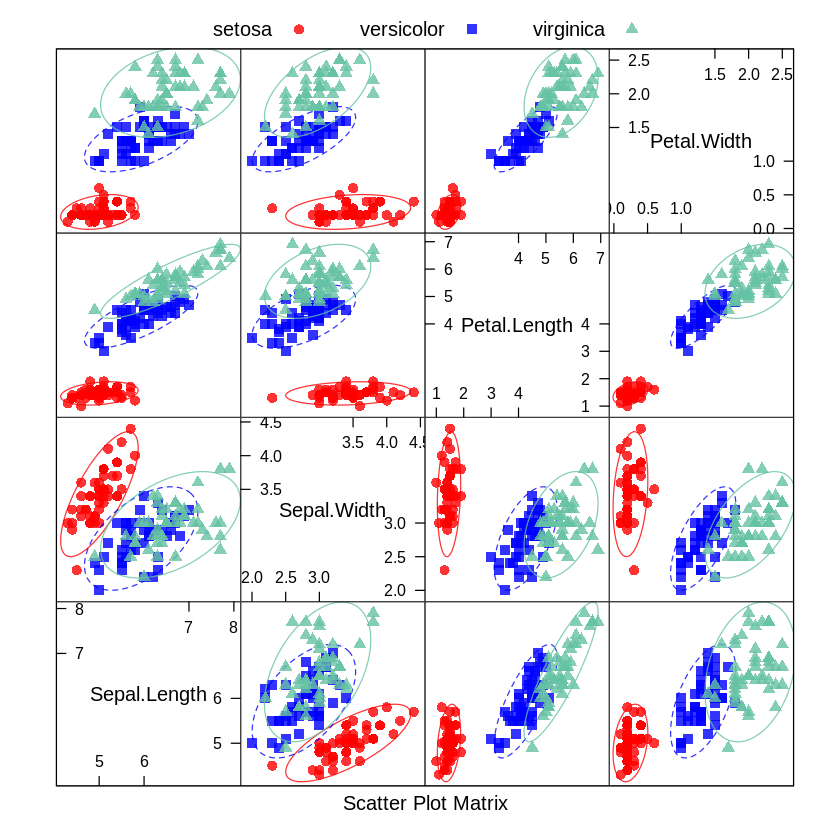

In [40]:
transparentTheme(trans = .8) 
caret:: featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "ellipse",
            ## Add a key at the top
            auto.key = list(columns = 3))

Overlayed Density Plots

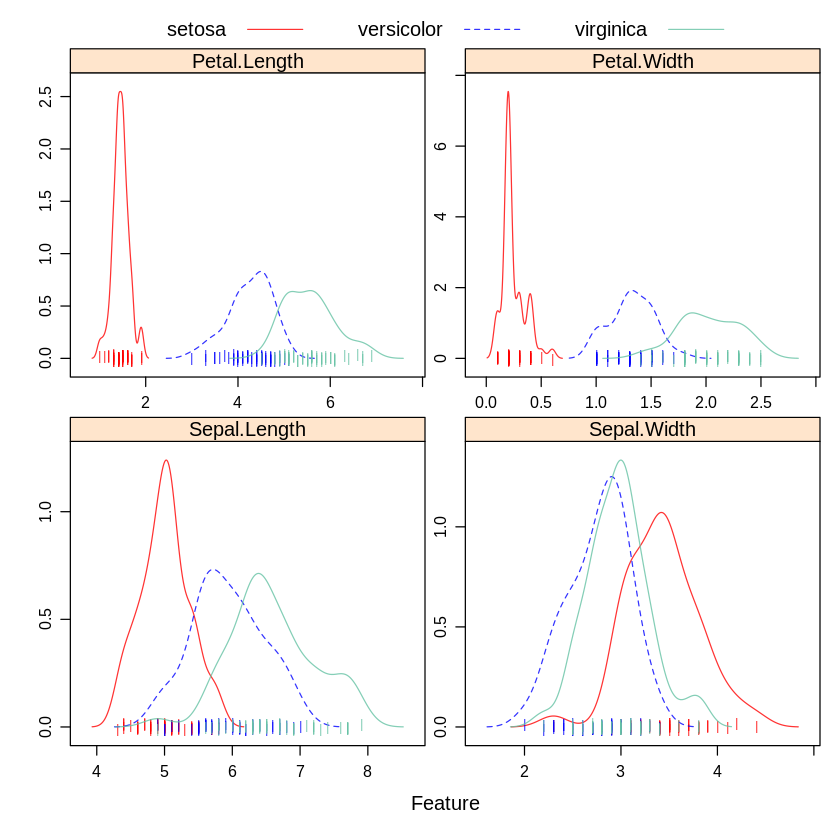

In [56]:
transparentTheme(trans = .8)
featurePlot(x = iris[, 1:4], 
            y = iris$Species,
            plot = "density", 
            scales = list(x = list(relation="free"), 
                          y = list(relation="free")), 
                          adjust = 1, #평활
                          pch = "|", 
                         # layout = c(4, 1), 

            auto.key = list(columns = 3))

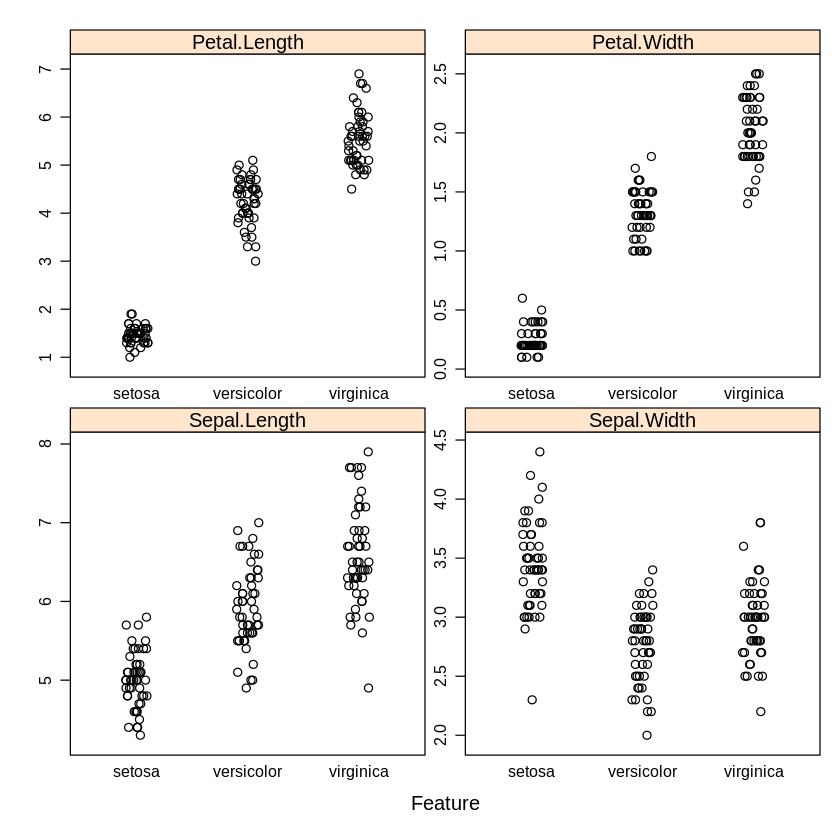

In [72]:
 transparentTheme(trans = .8)
 featurePlot(x=iris[, 1:4],
            y=iris$Species,
            "strip", 
            jitter = TRUE, # 지터로 분포 시각화 효과 
            scales = list(x = list(relation="free"), 
                          y = list(relation="free")), 
            adjust = 1, #평활
                       
                         # layout = c(4, 1), 

            auto.key = list(columns = 3))

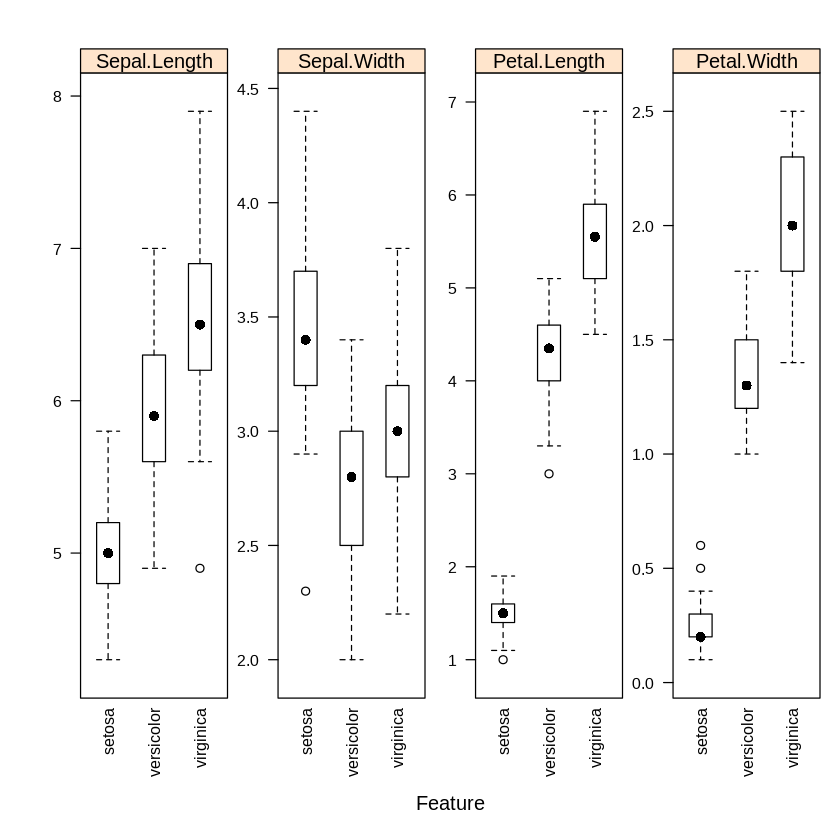

In [96]:
featurePlot(x = iris[, 1:4], 
            y = iris$Species, 
            plot = "box", 
            ## Pass in options to bwplot() 
            scales = list(y = list(relation="free", rot=1),
                          x = list(rot = 90)),  #라벨 각도
            layout = c(4,1 ), 
            #auto.key = list(columns = 2)
            )

# [예제] 회귀
For regression, ‘pairs’ or
          ‘scatter’

In [100]:
#데이터 로드
#install.packages("mlbench") 
#library(mlbench)
df=BostonHousing 

In [101]:
dplyr::glimpse(df)

Rows: 506
Columns: 14
$ crim    <dbl> 0.00632, 0.02731, 0.02729, 0.03237, 0.06905, 0.02985, 0.08829,…
$ zn      <dbl> 18.0, 0.0, 0.0, 0.0, 0.0, 0.0, 12.5, 12.5, 12.5, 12.5, 12.5, 1…
$ indus   <dbl> 2.31, 7.07, 7.07, 2.18, 2.18, 2.18, 7.87, 7.87, 7.87, 7.87, 7.…
$ chas    <fct> 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,…
$ nox     <dbl> 0.538, 0.469, 0.469, 0.458, 0.458, 0.458, 0.524, 0.524, 0.524,…
$ rm      <dbl> 6.575, 6.421, 7.185, 6.998, 7.147, 6.430, 6.012, 6.172, 5.631,…
$ age     <dbl> 65.2, 78.9, 61.1, 45.8, 54.2, 58.7, 66.6, 96.1, 100.0, 85.9, 9…
$ dis     <dbl> 4.0900, 4.9671, 4.9671, 6.0622, 6.0622, 6.0622, 5.5605, 5.9505…
$ rad     <dbl> 1, 2, 2, 3, 3, 3, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4,…
$ tax     <dbl> 296, 242, 242, 222, 222, 222, 311, 311, 311, 311, 311, 311, 31…
$ ptratio <dbl> 15.3, 17.8, 17.8, 18.7, 18.7, 18.7, 15.2, 15.2, 15.2, 15.2, 15…
$ b       <dbl> 396.90, 396.90, 392.83, 394.63, 396.90, 394.12, 395.60, 396.90…
$ lstat   <dbl> 4.

In [103]:
skim(df)

── Data Summary ────────────────────────
                           Values
Name                       df    
Number of rows             506   
Number of columns          14    
_______________________          
Column type frequency:           
  factor                   1     
  numeric                  13    
________________________         
Group variables            None  

── Variable type: factor ───────────────────────────────────────────────────────
  skim_variable n_missing complete_rate ordered n_unique top_counts   
1 chas                  0             1 FALSE          2 0: 471, 1: 35

── Variable type: numeric ──────────────────────────────────────────────────────
   skim_variable n_missing complete_rate    mean      sd        p0      p25
 1 crim                  0             1   3.61    8.60    0.00632   0.0820
 2 zn                    0             1  11.4    23.3     0         0     
 3 indus                 0             1  11.1     6.86    0.46      5.19  
 4 nox   

Warning message in is.null(text_repr) || nchar(text_repr) == 0L:
“'length(x) = 2 > 1' in coercion to 'logical(1)'”


In [105]:
regVar <- c("age", "lstat", "tax")
str(df[, regVar])

'data.frame':	506 obs. of  3 variables:
 $ age  : num  65.2 78.9 61.1 45.8 54.2 58.7 66.6 96.1 100 85.9 ...
 $ lstat: num  4.98 9.14 4.03 2.94 5.33 ...
 $ tax  : num  296 242 242 222 222 222 311 311 311 311 ...


In [110]:
theme <- lattice::trellis.par.get()

In [129]:
theme$plot.symbol$col = rgb(.2, .2, .2, .4)
theme$plot.symbol$pch = 16 #모양
#theme$plot.line$col = rgb(1, 0, 0, .7)
#theme$plot.line$lwd = 2
trellis.par.set(theme)

In [113]:
?trellis.par.get

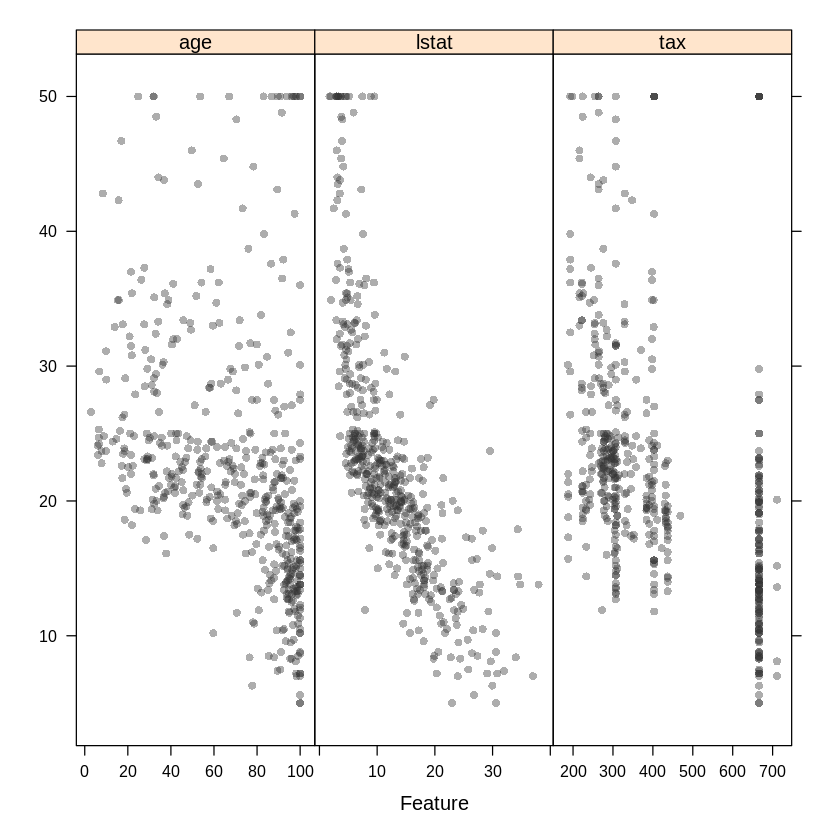

In [119]:
featurePlot(x = df[, regVar], 
            y = df$medv, 
            plot = "scatter", 
            
            layout = c(3, 1))
#x축 자동 스케일링 

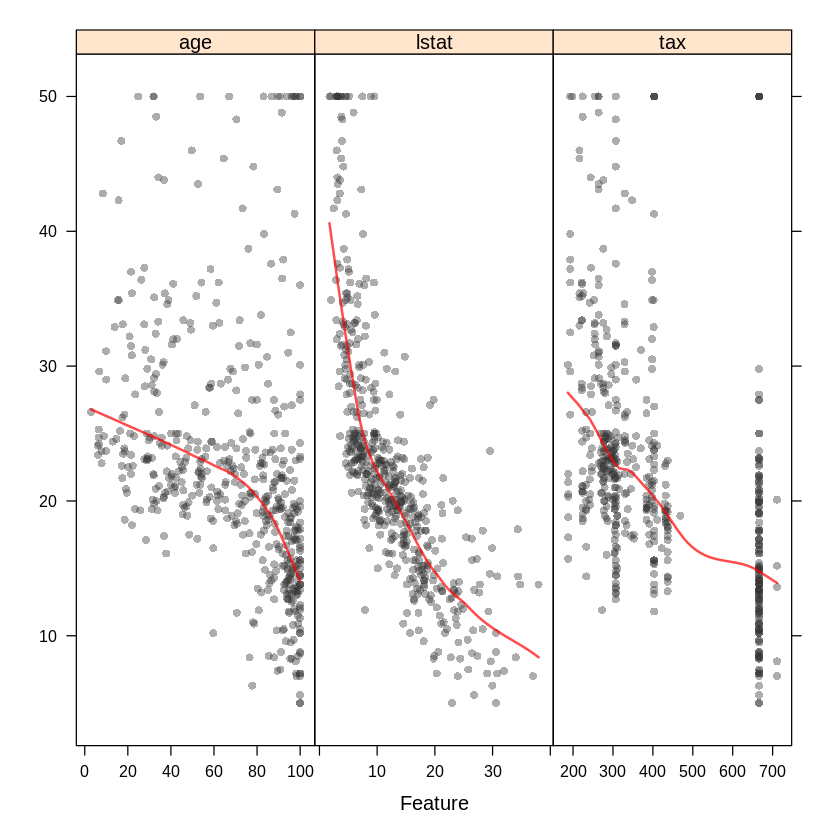

In [130]:
featurePlot(x = df[, regVar], 
            y = df$medv, 
            plot = "scatter", 
            type = c("p", "smooth"),
            span = .5,   # smoother 조정
            layout = c(3, 1))
#x축 자동 스케일링  

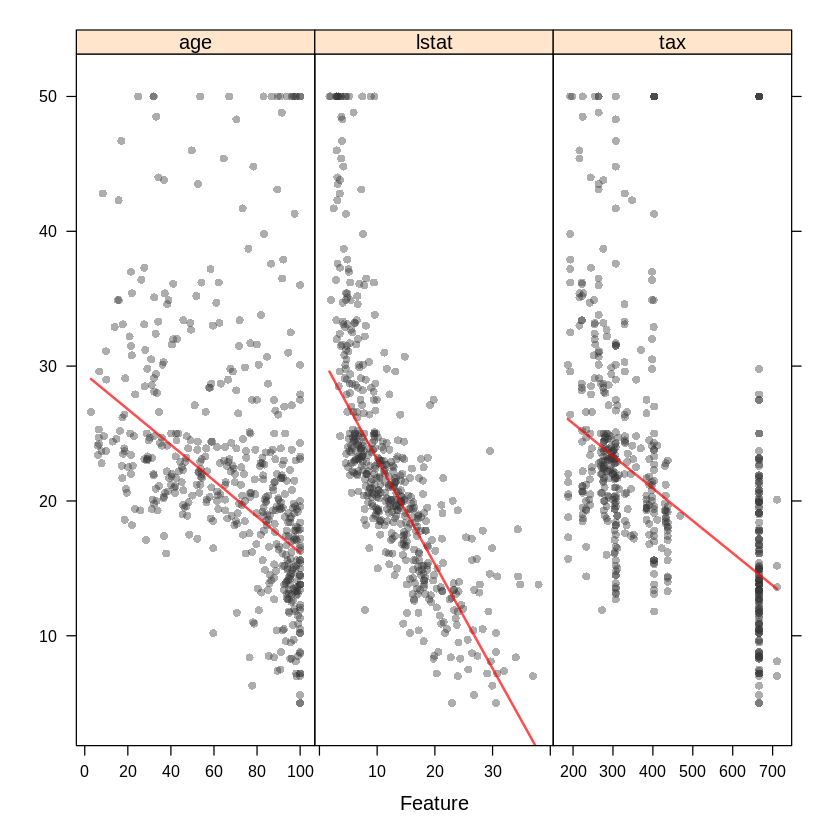

In [132]:
featurePlot(x = df[, regVar], 
            y = df$medv, 
            plot = "scatter", 
            type = c("p", "smooth"),
            span = 5,   # smoother 조정
            layout = c(3, 1))
#x축 자동 스케일링  